# Earth Lab Python Course Final Project: US Soil Moisture Project
_____

* This notebook is a data retrieval notebook for soil moisture data from the National Soil Moisture Network SCAN stations.
* Data Source: National Soil Moisture Network; Soil Climate Analysis Network (SCAN)

In [1]:
NAME = "Kendall Rosenberg"
COLLABORATORS = "N/A"

## Helpful links:

* Link to Pandas website: <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html" target="_blank">here</a>

* Link to Earth Data Science Textbook: <a href="https://www.earthdatascience.org/courses/intro-to-earth-data-science/" target="_blank">here</a>

* Compare with LERI: <a href="https://psl.noaa.gov/leri/" target="_blank">here</a>

## Import Libraries

In [2]:
# Import necessary libraries
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import pandas as pd
import earthpy as et
import earthpy.plot as ep
import numpy as np
from scipy import stats
from scipy.stats import zscore
import seaborn as sns
import warnings

# Ignore warnings
warnings.simplefilter('ignore')

In [3]:
# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'usgs-nccasc-soil-moisture'))

# # Create export csv directory
# if not os.path.exists("soil-moisture-export-csvs"):
#     os.mkdir("soil-moisture-export-csvs")

### Un-comment and run the cell below if you want to view all dataframes in full:

Running this cell will make all displayed dataframe outputs within this notebook display in full (show all rows/columns) rather than providing a condensed viewing version.

In [4]:
# # Command to make all dataframes display in full
# pd.set_option("display.max_rows", None, "display.max_columns", None)

## Functions:

In [5]:
# import custom script of functions needed to run this notebook
import customfunctions

## Download and Import Data

* Use custom function defined above to download, import, and clean each site's data.  These cleaned output dataframes are then placed inside of an output dictionary for ease of access.
* Each site can be called in the dictionary by the station name I have assigned it.  The names of available station data are displayed below the following cell.
* All of the data is placed into a dictionary under the name "soil_moisture_dict"

**IMPORTANT:** To add new stations of data, the python script "imports.py" from the original repository must be edited to include the additional station url and name.

In [6]:
# Run script to import data
%run imports.py

In [7]:
month_list = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

In [8]:
# Display a list of all stations imported below
print(station_list)

['Bushland #2006', 'Nunn #2017', 'Fort Assiniboine #2019', 'Mandan #2020', 'Lind #2021', 'Beasley Lake #2032', 'Eastview Farm #2077', 'Mammoth Cave #2079', 'Abrams #2092']


# START QUERY HERE
___

## Enter station name and year desired:
* This cell will determine the output of the notebook. **THE NOTEBOOK WILL NOT RUN WITHOUT THIS INFORMATION FILLED OUT**
* Enter station name (from list above, exactly as it appears in the list) that you wish to examine
* Enter the year you wish to examine for outputs that examine specific years (monthly mean, daily mean, etc.)

In [9]:
# Enter station name and year (a four-digit integer year and string year must both be provided) for analysis
variable = "Nunn #2017"
year_view = 2000
year_str = "2000"

In [10]:
# # Change working directory for export csvs
# os.chdir("soil-moisture-export-csvs")

### Preview dataframe for any station

In [11]:
# Query for a specific station's soil moisture dataframe
soil_moisture_dict[variable]

,Station ID,year,month,day,doy,sm_5cm,sm_10cm,sm_20cm,sm_50cm,sm_100cm,decad,pentad
0,Nunn #2017,1997.0,Mar,18.0,77.0,0.236,0.281,0.280,0.091,0.134,decad1,pentad3
1,Nunn #2017,1997.0,Mar,19.0,78.0,0.235,0.283,0.285,0.092,0.133,decad1,pentad3
2,Nunn #2017,1997.0,Mar,20.0,79.0,0.232,0.284,0.288,0.093,0.133,decad1,pentad3
3,Nunn #2017,1997.0,Mar,21.0,80.0,0.231,0.284,0.291,0.094,0.134,decad2,pentad4
4,Nunn #2017,1997.0,Mar,22.0,81.0,0.222,0.278,0.287,0.095,0.136,decad2,pentad4
...,...,...,...,...,...,...,...,...,...,...,...,...
7723,Nunn #2017,2019.0,May,18.0,138.0,0.221,0.200,0.223,0.190,0.154,decad1,pentad3
7724,Nunn #2017,2019.0,May,19.0,139.0,0.221,0.202,0.220,0.195,0.152,decad1,pentad3
7725,Nunn #2017,2019.0,May,20.0,140.0,0.234,0.204,0.217,0.191,0.159,decad1,pentad3
7726,Nunn #2017,2019.0,May,21.0,141.0,0.275,0.263,0.215,0.190,0.152,decad2,pentad4


In [12]:
# # Export to csv file
# soil_moisture_dict[variable].to_csv(variable+"_raw_sm.csv")

# # Where was this exported? See output
# os.getcwd()

### Soil Moisture Mean for Each Depth

In [13]:
# Print the mean values across historical period of soil moisture at each depth
mean_soil_moisture_df = soil_moisture_dict[variable]
five_cm_mean = mean_soil_moisture_df['sm_5cm'].mean()
ten_cm_mean = mean_soil_moisture_df['sm_10cm'].mean()
twenty_cm_mean = mean_soil_moisture_df['sm_20cm'].mean()
fifty_cm_mean = mean_soil_moisture_df['sm_50cm'].mean()
hundred_cm_mean = mean_soil_moisture_df['sm_100cm'].mean()

# Print these values
print('Station: '+variable+'\n')
print("The 5cm mean is", five_cm_mean)
print("The 10cm mean is", ten_cm_mean)
print("The 20cm mean is", twenty_cm_mean)
print("The 50cm mean is", fifty_cm_mean)
print("The 100cm mean is", hundred_cm_mean)

Station: Nunn #2017

The 5cm mean is 0.16204747258625304
The 10cm mean is 0.20235727225672878
The 20cm mean is 0.2074668737060041
The 50cm mean is 0.16348999046711155
The 100cm mean is 0.15806767598343685


### Missing data review

Note that this cell only describes actual inputed NaN values.  This will not give any indication if there is physically absent data in the dataframe.

In [14]:
# Total number of missing values in each column
print('Station: '+variable)
soil_moisture_dict[variable].isnull().sum()

Station: Nunn #2017


Station ID      0
year            0
month           0
day             0
doy             0
sm_5cm        250
sm_10cm         0
sm_20cm         0
sm_50cm       385
sm_100cm        0
decad           0
pentad          0
dtype: int64

### Histogram of station data

Station: Nunn #2017


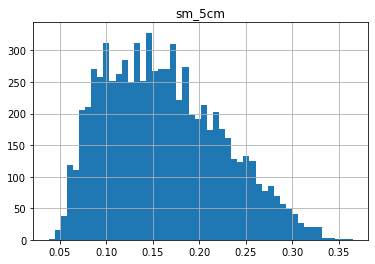

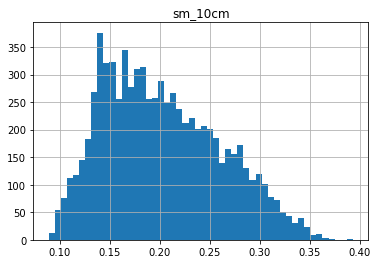

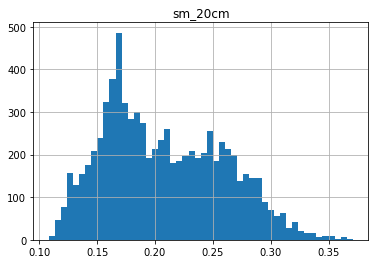

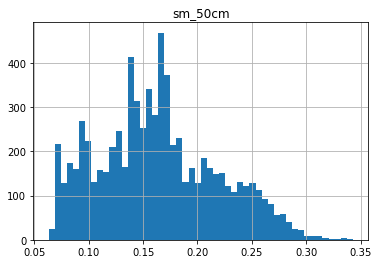

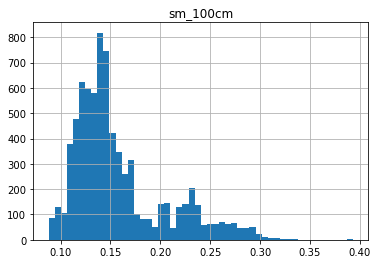

In [15]:
# Histogram of soil moisture values for a specific depth
print('Station: '+variable)
customfunctions.generate_hist(soil_moisture_dict[variable])

## Yearly Data
___

### Yearly Average

In [16]:
# Yearly average SM for any input station
station_yearly_mean_sm = customfunctions.yearly_avg_sm(soil_moisture_dict[variable])

# Display
print('\nStation: '+variable)
station_yearly_mean_sm#.head()

2003 : This year did not contain enough data and was set as NaN
2019 : This year did not contain enough data and was set as NaN
2020 : This year did not contain enough data and was set as NaN

Station: Nunn #2017


,sm_5cm,sm_10cm,sm_20cm,sm_50cm,sm_100cm
1997.0,0.174488,0.229474,0.275875,0.171516,0.195197
1998.0,0.159677,0.214800,0.254515,0.136233,0.192433
1999.0,0.172479,0.219052,0.251685,0.151595,0.204836
2000.0,0.124038,0.178833,0.214492,0.147191,0.215872
2001.0,0.123995,0.170773,0.199019,0.145630,0.201510
2002.0,0.112877,0.159264,0.179149,0.096884,0.139518
2003.0,NaN,NaN,NaN,NaN,NaN
2004.0,0.125675,0.171566,0.202284,0.087809,0.134934
2005.0,0.127997,0.192107,0.225066,0.126534,0.136063
2006.0,0.113819,0.181781,0.214090,0.118989,0.131647


In [17]:
# # Export above dataframe to csv
# station_yearly_mean_sm.to_csv(variable+"_annual_mean.csv")

# # Where was this exported? See output
# os.getcwd()

### Yearly Average Z-Score

In [18]:
# Create input df
station_yearly_mean_zscore = customfunctions.yearly_avg_sm(soil_moisture_dict[variable])

# Remove non-numeric columns
station_yearly_mean_zscore = station_yearly_mean_zscore[['sm_5cm', 'sm_10cm', 'sm_20cm', 'sm_50cm', 'sm_100cm']]

# Calculate z-score for each depth, ignoring any NAN values
station_yearly_mean_zscore = station_yearly_mean_zscore.apply(zscore, nan_policy='omit')

# Display
print('\nStation: '+variable)
station_yearly_mean_zscore#.head()

2003 : This year did not contain enough data and was set as NaN
2019 : This year did not contain enough data and was set as NaN
2020 : This year did not contain enough data and was set as NaN

Station: Nunn #2017


,sm_5cm,sm_10cm,sm_20cm,sm_50cm,sm_100cm
1997.0,0.440089,0.990163,2.590420,0.296815,1.298700
1998.0,-0.048441,0.433786,1.768842,-0.704725,1.199945
1999.0,0.373843,0.595006,1.659987,-0.268667,1.643024
2000.0,-1.223934,-0.929917,0.229439,-0.393659,2.037275
2001.0,-1.225377,-1.235546,-0.365680,-0.437973,1.524204
2002.0,-1.592082,-1.671884,-1.129959,-1.821685,-0.690394
2003.0,NaN,NaN,NaN,NaN,NaN
2004.0,-1.169953,-1.205480,-0.240101,-2.079299,-0.854143
2005.0,-1.093351,-0.426642,0.636142,-0.980031,-0.813825
2006.0,-1.560999,-0.818161,0.214000,-1.194210,-0.971599


In [19]:
# # Export above dataframe to csv
# station_yearly_mean_zscore.to_csv(variable+"_annual_zscore.csv")

# # Where was this exported? See output
# os.getcwd()

### Yearly Average Z-Score Plot

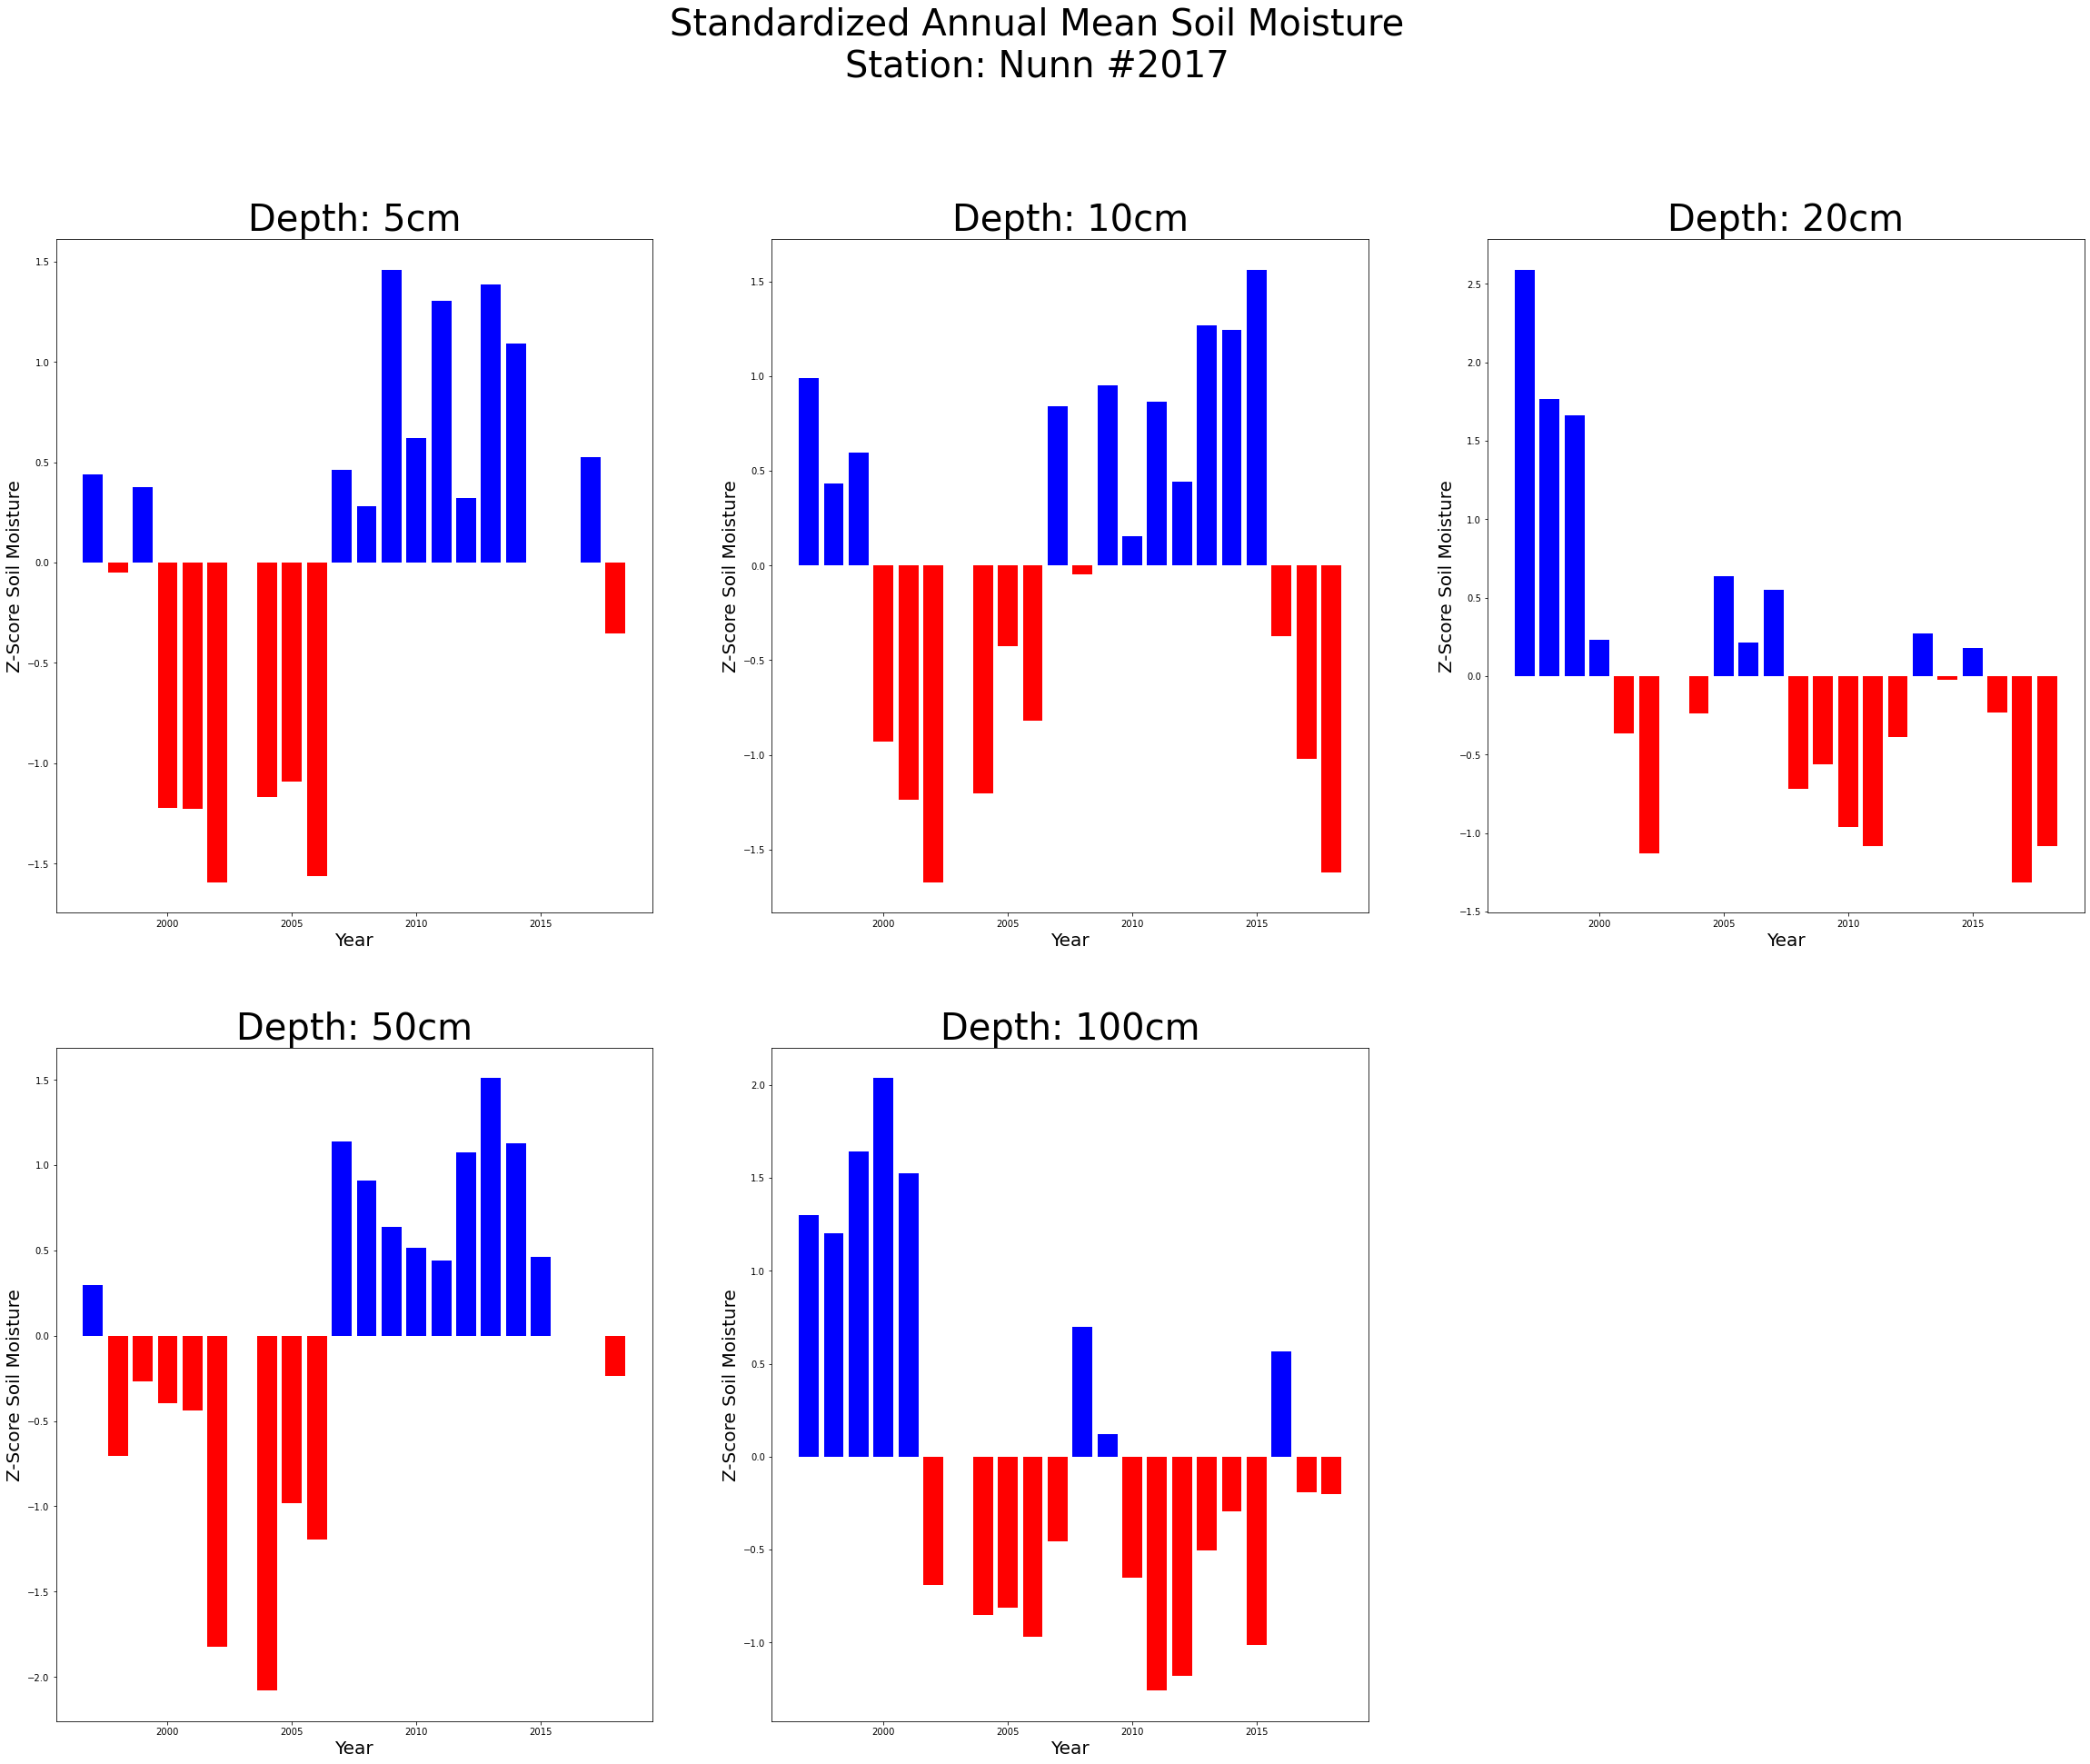

In [20]:
# Generate z-score plot of annual mean soil moisture
customfunctions.zscore_plot(station_yearly_mean_zscore, "Year", "Standardized Annual Mean Soil Moisture\nStation: "+variable)

### Month of the Year Average

Mean soil moisture data for a specific month, across all years of data.

In [21]:
# Enter month here
month = 'Jul'

# Month of year average dataframe creation
station_yr_mean_month = customfunctions.yearly_mean_month(soil_moisture_dict[variable], month)

# Display
print('\nStation: '+variable+'\nMonth: '+month)
station_yr_mean_month#.head()

Jul 2003 : Did not contain enough data and was set as NaN
Jul 2019 : Did not contain enough data and was set as NaN
Jul 2020 : Did not contain enough data and was set as NaN

Station: Nunn #2017
Month: Jul


,sm_5cm,sm_10cm,sm_20cm,sm_50cm,sm_100cm
1997.0,0.123903,0.176645,0.231000,0.165645,0.157968
1998.0,0.167452,0.218000,0.259581,0.171677,0.190161
1999.0,0.149774,0.198645,0.237581,0.158516,0.244032
2000.0,0.089161,0.154677,0.190710,0.116419,0.157581
2001.0,0.141806,0.183323,0.219871,0.144774,0.201903
2002.0,0.125226,0.164161,0.193355,0.091452,0.149355
2003.0,NaN,NaN,NaN,NaN,NaN
2004.0,0.126871,0.169516,0.209258,0.097161,0.145806
2005.0,0.085387,0.143258,0.174710,0.110065,0.159129
2006.0,0.109677,0.187484,0.188161,0.106032,0.143097


In [22]:
# # Export above dataframe to csv
# station_yr_mean_month.to_csv(variable+"_monthly_timeseries_"+month+".csv")

# # Where was this exported? See output
# os.getcwd()

### Month of Year Z-Score

In [23]:
# Enter month here
month = 'Jul'

# Create input df
month_of_year_zscore = customfunctions.yearly_mean_month(soil_moisture_dict[variable], month)

# Remove non-numeric columns
month_of_year_zscore = month_of_year_zscore[['sm_5cm', 'sm_10cm', 'sm_20cm', 'sm_50cm', 'sm_100cm']]

# Calculate z-score for each depth, ignoring any NAN values
month_of_year_zscore = month_of_year_zscore.apply(zscore, nan_policy='omit')

# Display
print('\nStation: '+variable+'\nMonth: '+month)
month_of_year_zscore#.head()

Jul 2003 : Did not contain enough data and was set as NaN
Jul 2019 : Did not contain enough data and was set as NaN
Jul 2020 : Did not contain enough data and was set as NaN

Station: Nunn #2017
Month: Jul


,sm_5cm,sm_10cm,sm_20cm,sm_50cm,sm_100cm
1997.0,-0.715115,-0.489335,0.958550,-0.087972,-0.303572
1998.0,0.326992,0.600586,2.081505,0.045503,0.747868
1999.0,-0.096026,0.090483,1.217108,-0.245715,2.507292
2000.0,-1.546485,-1.068302,-0.624488,-1.177181,-0.316215
2001.0,-0.286693,-0.313349,0.521282,-0.549780,1.131359
2002.0,-0.683466,-0.818351,-0.520557,-1.729637,-0.584869
2003.0,NaN,NaN,NaN,NaN,NaN
2004.0,-0.644098,-0.677223,0.104293,-1.603301,-0.700759
2005.0,-1.636801,-1.369263,-1.253140,-1.317794,-0.265644
2006.0,-1.055537,-0.203677,-0.724616,-1.407014,-0.789257


In [24]:
# # Export above dataframe to csv
# month_of_year_zscore.to_csv(variable+"_zscore_monthly_timeseries_"+month+".csv")

# # Where was this exported? See output
# os.getcwd()

### Month of Year Z-Score Plot
* Generate an image showing Z-Score distribution for a specific month across all years of data.  In the code cell below, please enter your desired figure title in quotes.

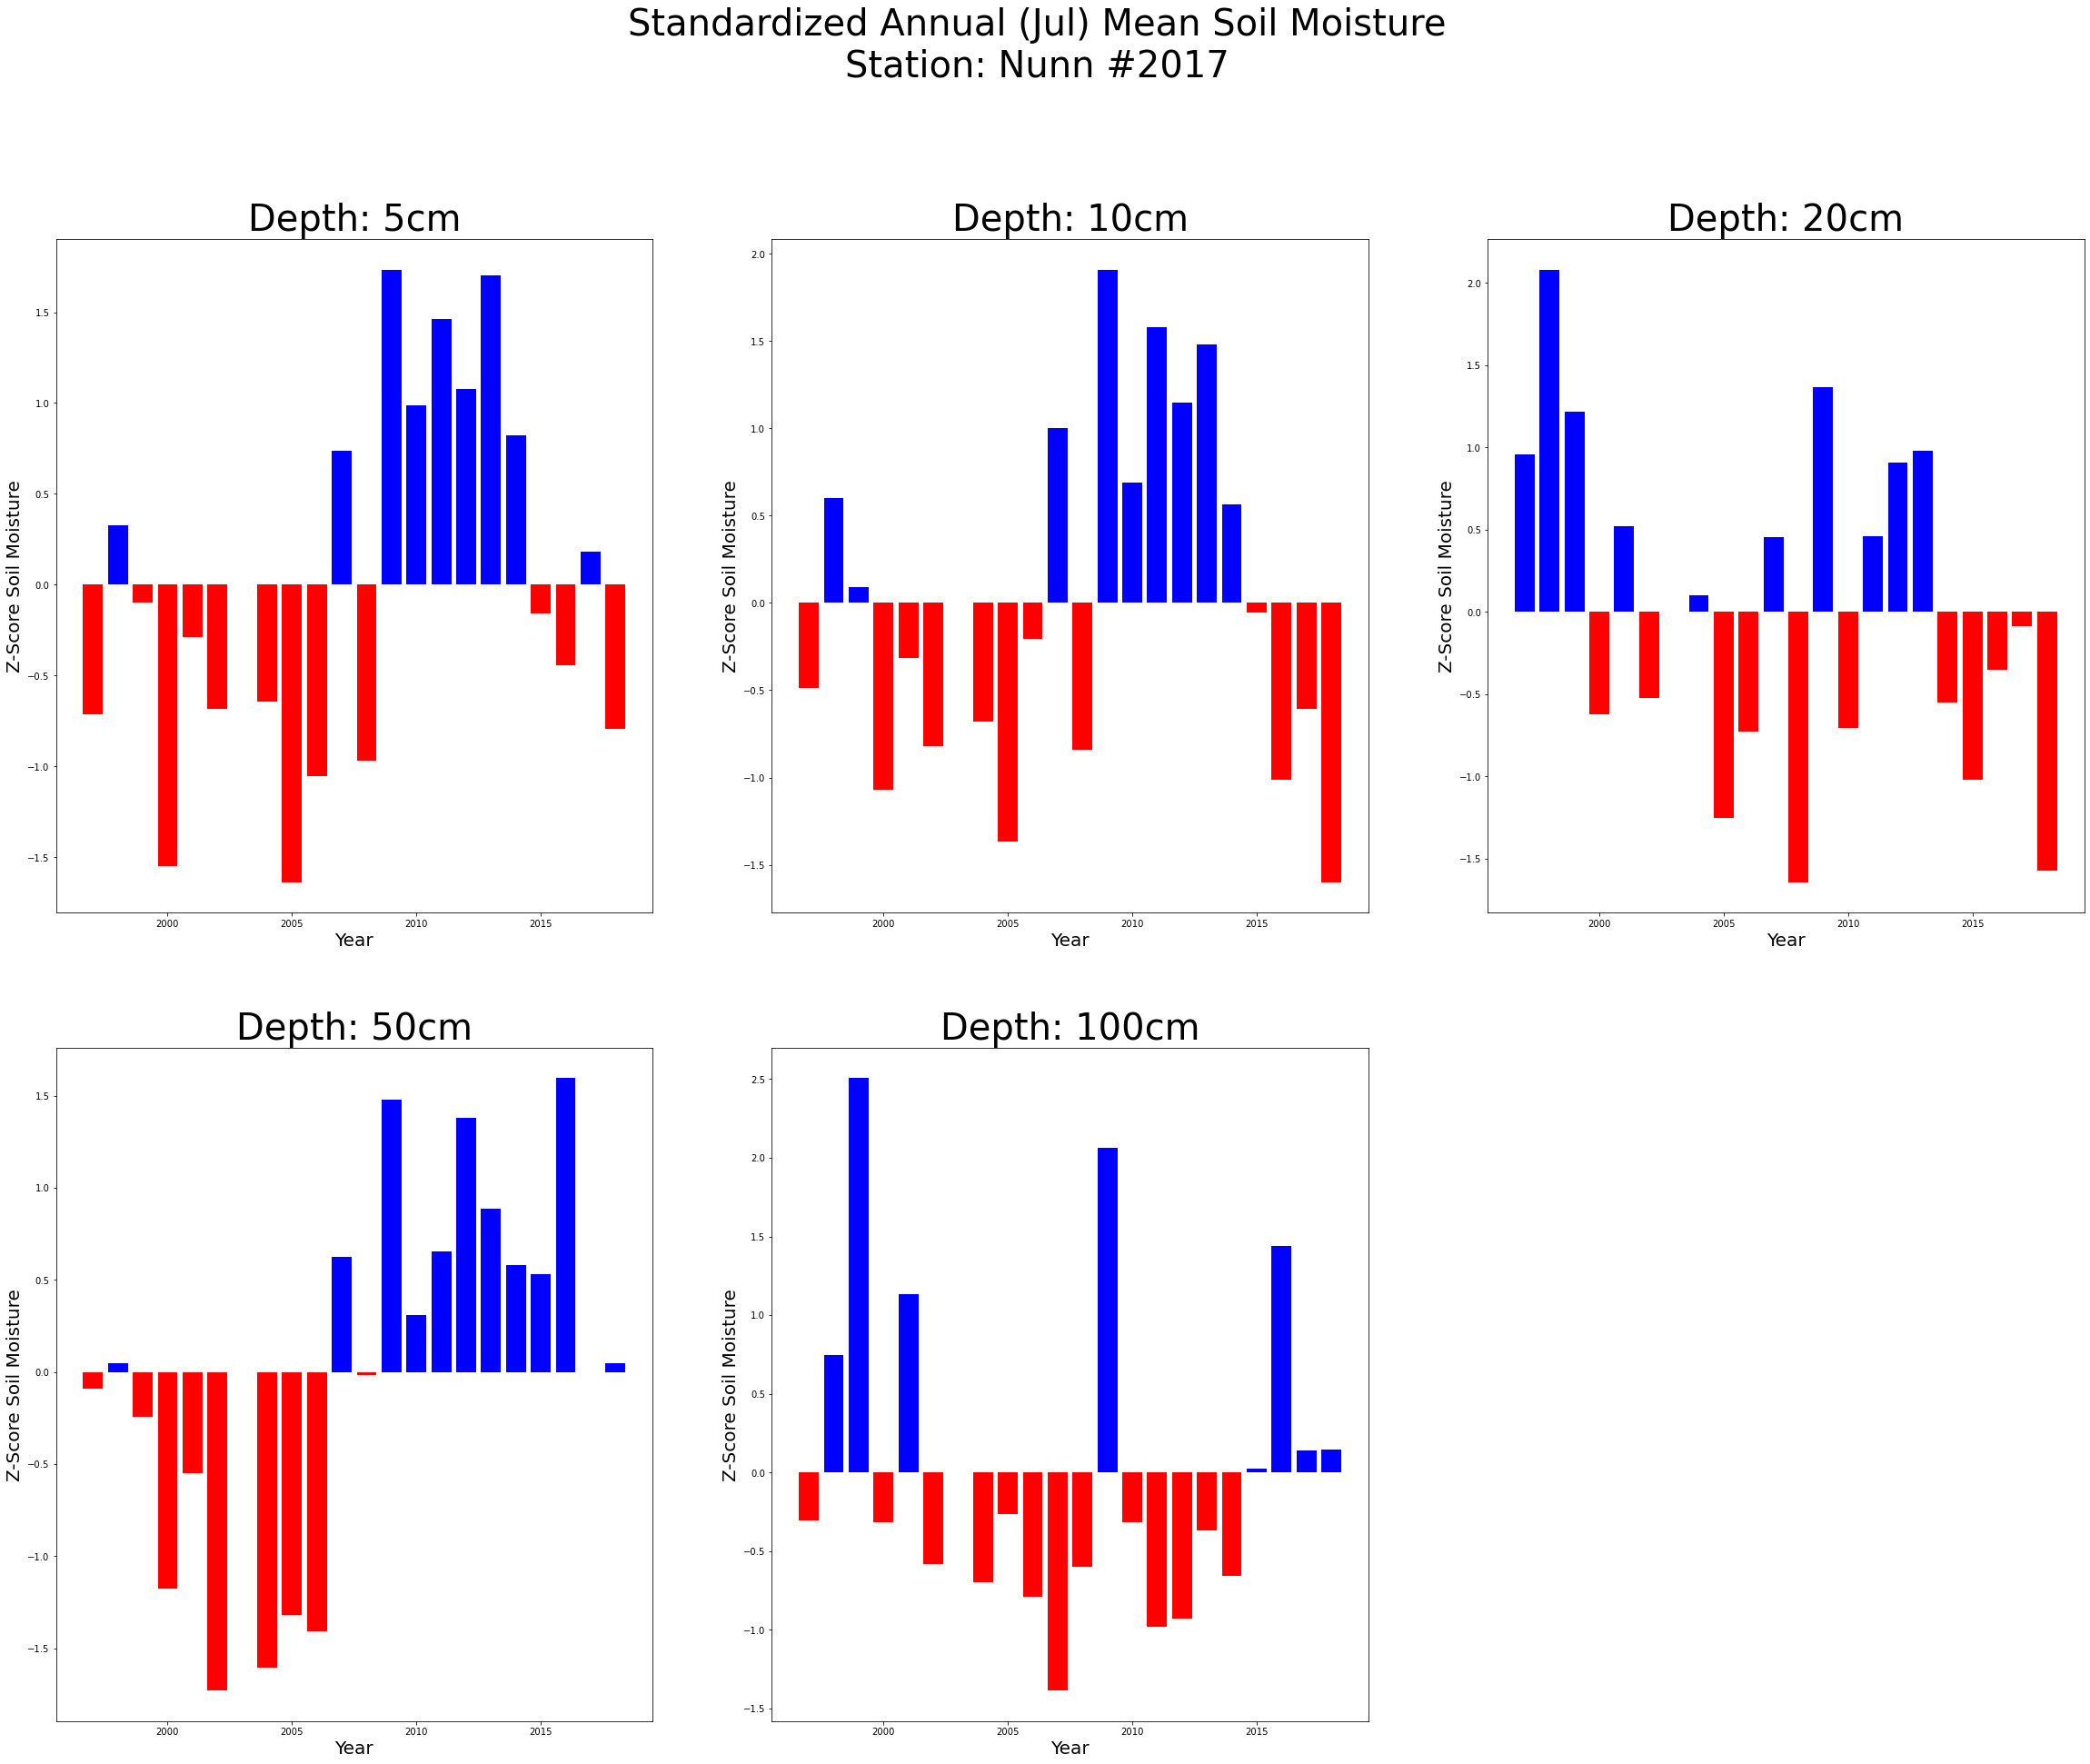

In [25]:
# Generate z-score plot of month of the year timeseries
customfunctions.zscore_plot(month_of_year_zscore, "Year", "Standardized Annual ("+month+") Mean Soil Moisture\nStation: "+variable)

## Monthly Data
___

### Monthly Average for a Specific Year
* year must be in integer format

In [26]:
# Dataframe of monthly mean soil moisture 
station_monthly_mean_year = customfunctions.monthly_mean(soil_moisture_dict[variable], year_view)

# Display
print('\nStation: '+variable+'\nYear: '+year_str)
station_monthly_mean_year


Station: Nunn #2017
Year: 2000


,sm_5cm,sm_10cm,sm_20cm,sm_50cm,sm_100cm
month,,,,,
Jan,0.103839,0.151645,0.183032,0.119065,0.199806
Feb,0.138793,0.178310,0.199586,0.119897,0.200793
Mar,0.173452,0.214355,0.235355,0.124032,0.205194
Apr,0.147000,0.192633,0.229433,0.130900,0.208333
May,0.147968,0.194000,0.231387,0.131516,0.202484
Jun,0.103800,0.165300,0.198733,0.123567,0.172967
Jul,0.089161,0.154677,0.190710,0.116419,0.157581
Aug,0.143097,0.210419,0.240000,0.188742,0.231581
Sep,0.144500,0.199833,0.240233,0.203100,0.279433


In [27]:
# # Export above dataframe to csv
# station_monthly_mean_year.to_csv(variable+"_monthly_mean_2000.csv")

# # Where was this exported? See output
# os.getcwd()

### Monthly Average for a Specific Year Z-Score

In [28]:
# Generate z-score dataframe for monthly average soil moisture for a specified year
monthly_mean_zscore_dataframe = customfunctions.monthly_mean_zscore(soil_moisture_dict[variable], year_view)

# Display
print('Station: '+variable+'\nYear: '+year_str)
monthly_mean_zscore_dataframe

Station: Nunn #2017
Year: 2000


,year,sm_5cm,sm_10cm,sm_20cm,sm_50cm,sm_100cm
month,,,,,,
Jan,2000,-0.724434,-0.332628,0.246896,-0.451223,1.721536
Feb,2000,-0.401168,-0.382662,0.126152,-0.562637,1.742885
Mar,2000,-0.588491,-0.550321,0.348562,-0.678359,1.508490
Apr,2000,-1.044509,-1.125311,-0.088718,-0.949488,1.284070
May,2000,-0.980634,-0.899320,-0.187325,-1.125168,0.366292
Jun,2000,-1.371934,-1.035821,-0.675092,-1.264533,-0.344172
Jul,2000,-1.546485,-1.068302,-0.624488,-1.177181,-0.316215
Aug,2000,-0.171856,0.332092,0.762295,0.255351,1.708667
Sep,2000,-0.055165,0.247544,1.038751,0.798878,2.368142


In [29]:
# # Export above dataframe to csv
# monthly_mean_zscore_dataframe.to_csv(variable+"_2000_zscore_monthly_timeseries.csv")

# # Where was this exported? See output
# os.getcwd()

### Monthly Average for a Specific Year Z-Score Plot

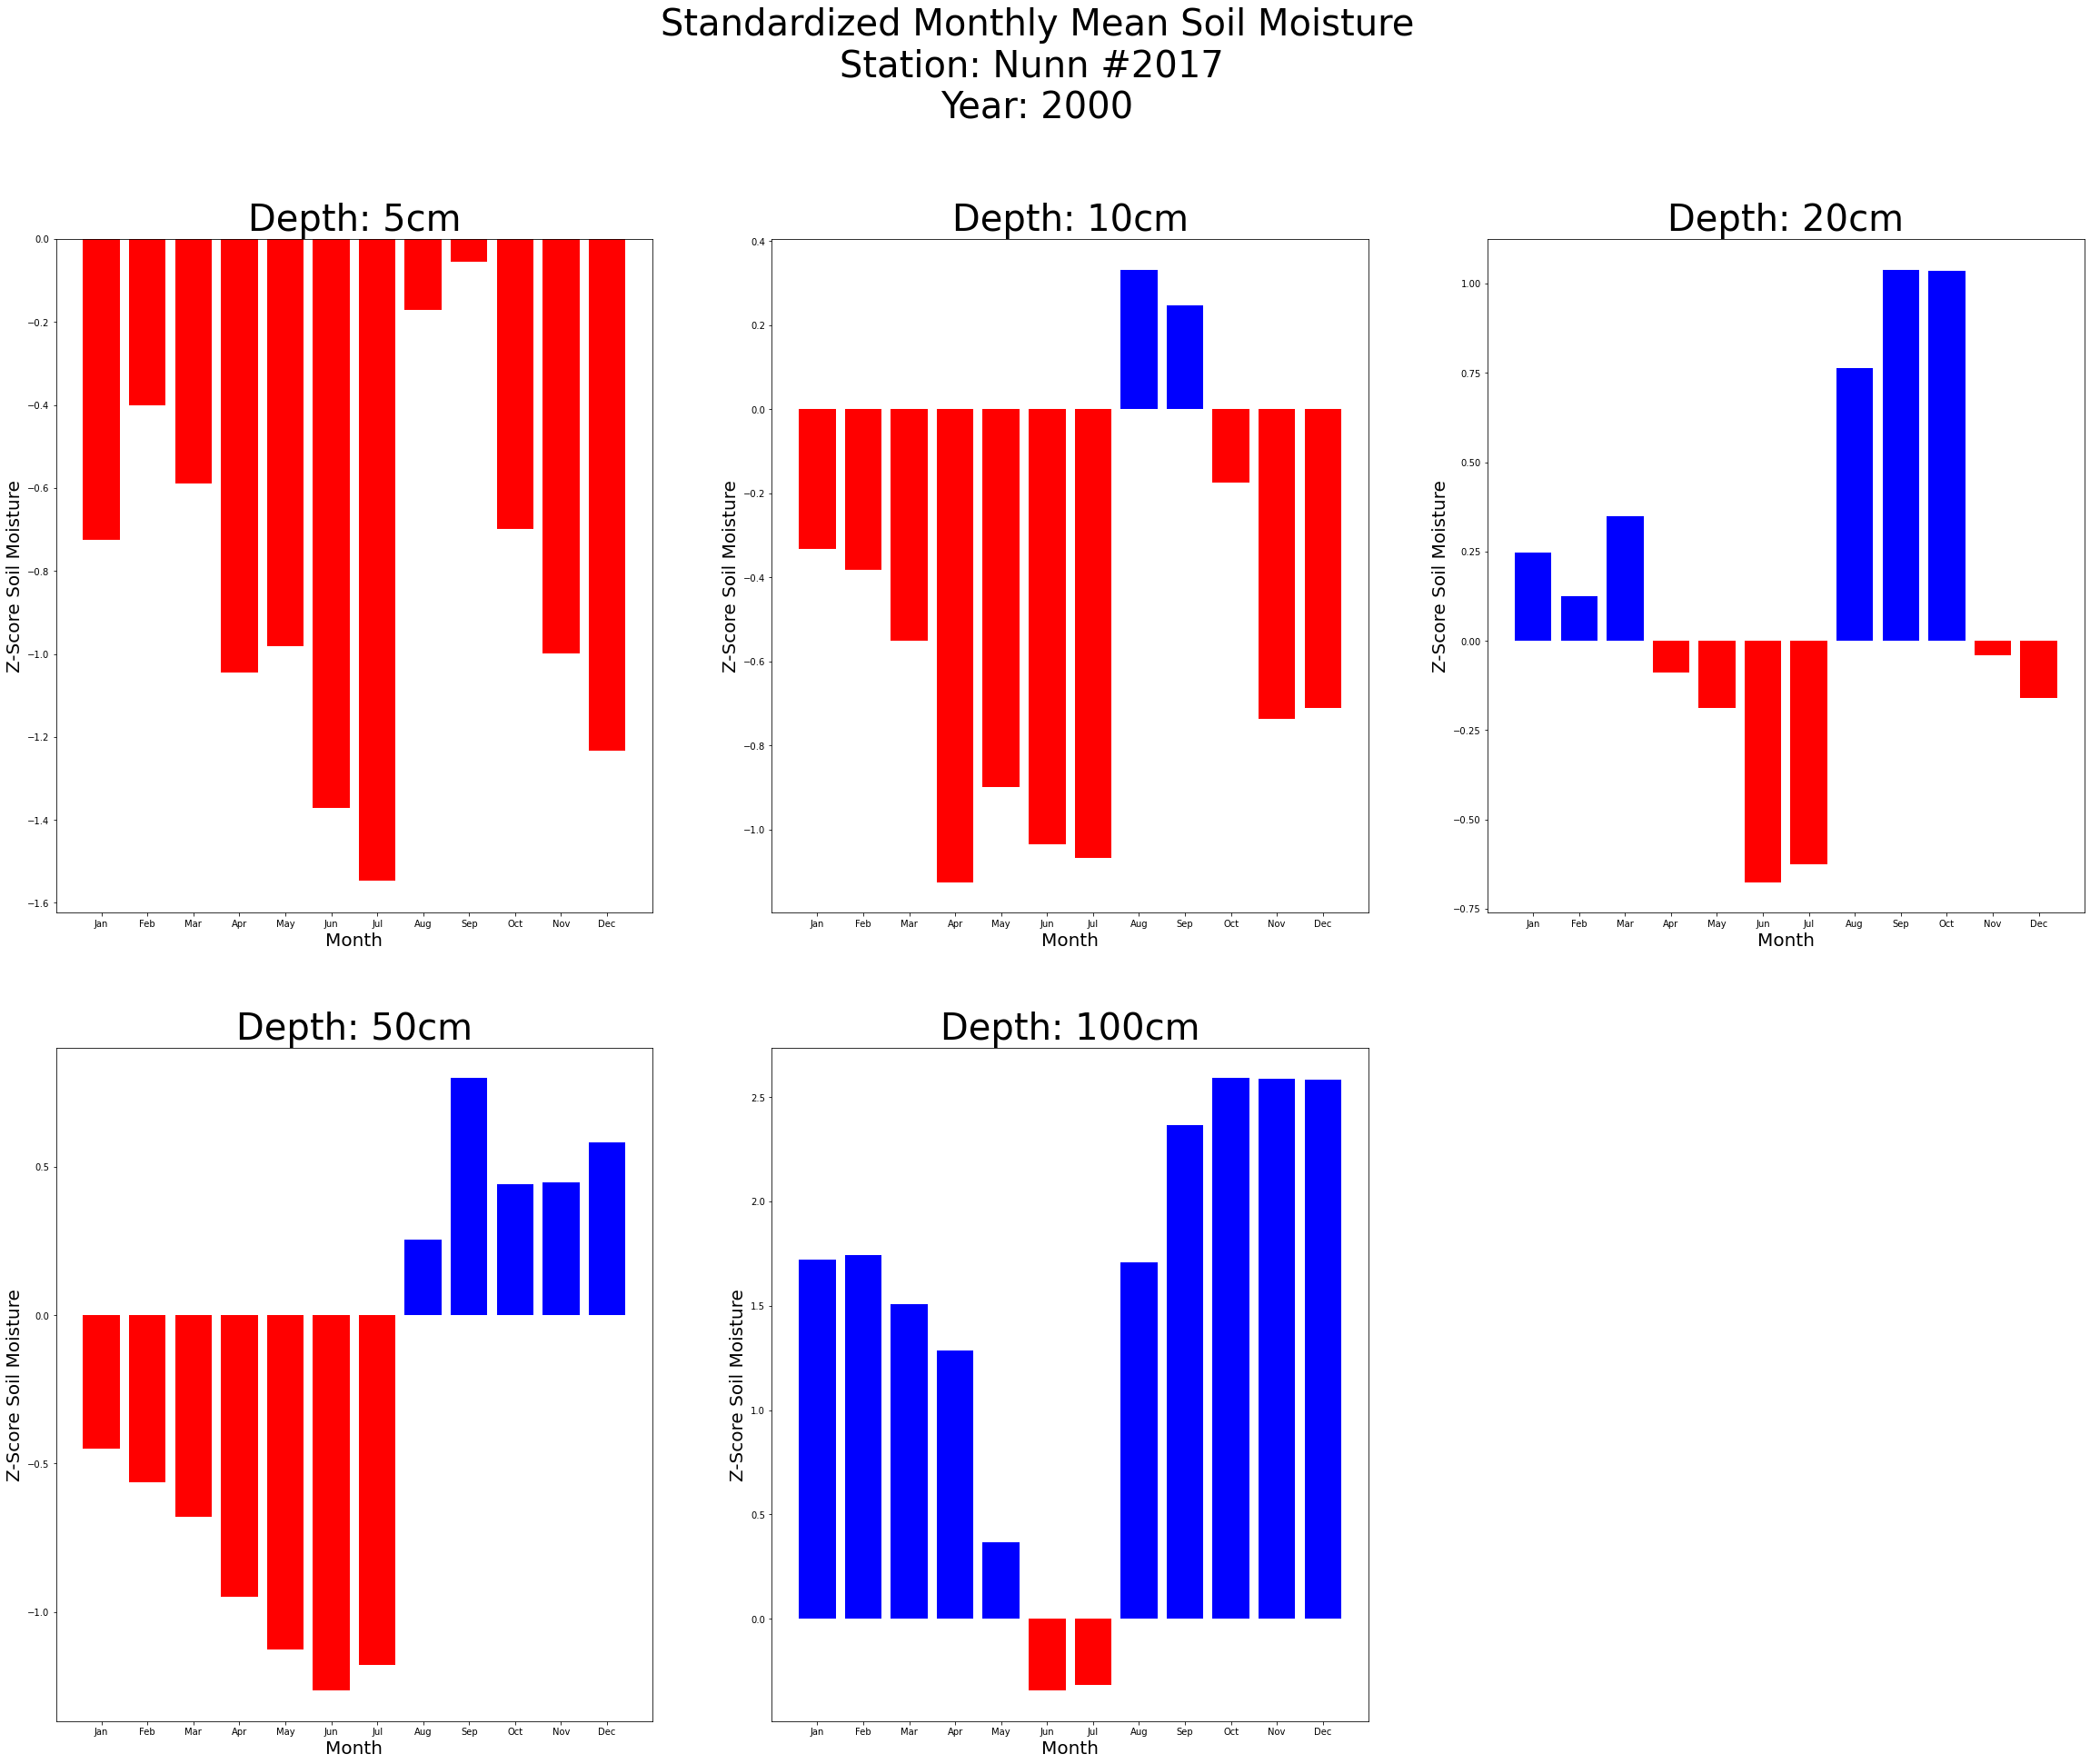

In [30]:
# Generate z-score plot of monthly mean soil moisture for a specified year
customfunctions.zscore_plot(monthly_mean_zscore_dataframe, "Month",
            "Standardized Monthly Mean Soil Moisture\nStation: "+variable+" \nYear: "+year_str)

### Monthly average SM at each depth across all years of data

In [31]:
# Dataframe creation of monthly mean SM across all years of data
station_monthly_mean_all_years = customfunctions.monthly_mean_all_years(soil_moisture_dict[variable])

# Display
print('Station: '+variable)
station_monthly_mean_all_years

Station: Nunn #2017


,sm_5cm,sm_10cm,sm_20cm,sm_50cm,sm_100cm
month,,,,,
Jan,0.129429,0.163488,0.173767,0.137260,0.136189
Feb,0.157431,0.197956,0.193619,0.146958,0.136099
Mar,0.194997,0.235122,0.221129,0.156696,0.144976
Apr,0.196093,0.232929,0.233026,0.177005,0.157195
May,0.202046,0.231733,0.238470,0.194684,0.182473
Jun,0.169078,0.211016,0.224846,0.190965,0.189916
Jul,0.153837,0.195212,0.206604,0.169621,0.167263
Aug,0.150724,0.196369,0.209685,0.175992,0.169909
Sep,0.147045,0.188871,0.196752,0.169902,0.168951


In [32]:
# # Export above dataframe to csv
# station_monthly_mean_all_years.to_csv(variable+"_monthly_mean_all.csv")

# # Where was this exported? See output
# os.getcwd()

## Daily Data
___

### Daily average for a specific year
* year must be in integer format

In [33]:
# Daily average SM
station_daily_avg_year = customfunctions.daily_avg(soil_moisture_dict[variable], year_view)
station_daily_avg_year

,Station ID,year,month,day,sm_5cm,sm_10cm,sm_20cm,sm_50cm,sm_100cm,decad,pentad
doy,,,,,,,,,,,
1.0,Nunn #2017,2000.0,Jan,1.0,0.121,0.156,0.186,0.121,0.200,decad0,pentad0
2.0,Nunn #2017,2000.0,Jan,2.0,0.119,0.154,0.185,0.120,0.200,decad0,pentad0
3.0,Nunn #2017,2000.0,Jan,3.0,0.116,0.156,0.187,0.119,0.200,decad0,pentad0
4.0,Nunn #2017,2000.0,Jan,4.0,0.113,0.152,0.182,0.122,0.199,decad0,pentad0
5.0,Nunn #2017,2000.0,Jan,5.0,0.110,0.154,0.183,0.121,0.199,decad0,pentad0
...,...,...,...,...,...,...,...,...,...,...,...
362.0,Nunn #2017,2000.0,Dec,27.0,0.076,0.133,0.162,0.162,0.233,decad2,pentad5
363.0,Nunn #2017,2000.0,Dec,28.0,0.081,0.145,0.170,0.163,0.234,decad2,pentad5
364.0,Nunn #2017,2000.0,Dec,29.0,0.075,0.134,0.167,0.165,0.234,decad2,pentad5


In [34]:
# # Export above dataframe to csv
# station_daily_avg_year.to_csv(variable+"_daily_mean_"+year_str+".csv")

# # Where was this exported? See output
# os.getcwd()

### Z-Score daily dataframe -- IN-PROGRESS

### Z-Score daily plot -- IN-PROGRESS

### Daily Average for each day of the year, across all years of data -- UNRELIABLE DUE TO LEAP YEAR DATA

**IMPORTANT:** This section (2.4.4) is currently unreliable due to the addition of leap years into the dataset.  Please ignore this section for the time being!

In [53]:
# # Daily average SM across all years of data for the Bushland, TX station
# station_daily_mean_all_years = customfunctions.daily_avg_all_years(soil_moisture_dict[variable])

# # Display
# print('Station: '+variable)
# station_daily_mean_all_years#.head()

In [36]:
# # Export above dataframe to csv
# station_daily_mean_all_years.to_csv(variable+"_doy_mean_all_years.csv")

# # Where was this exported? See output
# os.getcwd()

## Decad (10-day) Data
___

* decad0 = days 1-10
* decad1 = days 11-20
* decad2 = days 20-31 

### Decad Average for a specific year

In [37]:
# Create dataframe showing mean soil moisture over 5 monthly decads (~10 day periods)
station_decad_mean_df = customfunctions.decad_mean(soil_moisture_dict[variable], year_view)

# Display
print('Station: '+variable+'\nYear: '+year_str)
station_decad_mean_df#.head()

Station: Nunn #2017
Year: 2000


,year,month,decad,sm_5cm,sm_10cm,sm_20cm,sm_50cm,sm_100cm
0,2000,Jan,decad0,0.111600,0.152100,0.183300,0.119500,0.200100
0,2000,Jan,decad1,0.101900,0.153000,0.184000,0.118500,0.199000
0,2000,Jan,decad2,0.098545,0.150000,0.181909,0.119182,0.200273
0,2000,Feb,decad0,0.100000,0.149300,0.179100,0.118700,0.199200
0,2000,Feb,decad1,0.143400,0.174500,0.193500,0.119900,0.201300
0,2000,Feb,decad2,0.176778,0.214778,0.229111,0.121222,0.202000
0,2000,Mar,decad0,0.168300,0.213800,0.233600,0.124200,0.204400
0,2000,Mar,decad1,0.168000,0.209100,0.229500,0.123200,0.205400
0,2000,Mar,decad2,0.183091,0.219636,0.242273,0.124636,0.205727
0,2000,Apr,decad0,0.179400,0.214500,0.241300,0.128400,0.206700


In [38]:
# # Export above dataframe to csv
# station_decad_mean_df.to_csv(variable+"_decad_mean_"+year_str+".csv")

# # Where was this exported? See output
# os.getcwd()

### Decad Z-Score

In [39]:
station_decad_zscore = customfunctions.decad_zscore(soil_moisture_dict[variable], year_view)

# Display
print('Station: '+variable+'\nYear: '+year_str)
station_decad_zscore#.head()

Station: Nunn #2017
Year: 2000


,month,decad,sm_5cm,sm_10cm,sm_20cm,sm_50cm,sm_100cm
year,,,,,,,
2000.0,Jan,decad0,-0.296656,-0.235226,0.336647,-0.416561,1.722187
2000.0,Jan,decad1,-0.729101,-0.163245,0.289631,-0.462834,1.699385
2000.0,Jan,decad2,-0.832724,-0.486002,0.102346,-0.446667,1.739524
2000.0,Feb,decad0,-0.871502,-0.698637,-0.128349,-0.512693,1.714137
2000.0,Feb,decad1,-0.270310,-0.418582,0.000857,-0.566041,1.753680
2000.0,Feb,decad2,0.054322,0.070061,0.512631,-0.585004,1.760439
2000.0,Mar,decad0,-0.371526,-0.205800,0.516445,-0.561804,1.652989
2000.0,Mar,decad1,-0.769372,-0.785095,0.198735,-0.681011,1.448184
2000.0,Mar,decad2,-0.457740,-0.638857,0.225380,-0.683316,1.465710


In [40]:
# # Export above dataframe to csv
# station_decad_zscore.to_csv(variable+"_decad_zscore_"+year_str+".csv")

# # Where was this exported? See output
# os.getcwd()

### Decad Z-Score Plot -- IN-PROGRESS

In [52]:
# customfunctions.zscore_plot(station_decad_zscore, "Month",
#             "Standardized Decad (10-day) Mean Soil Moisture\nStation: "+variable+" \nYear: "+year_str)

## Pentad (5-day) Data
___

* pentad0 = days 1-5
* pentad1 = days 6-10
* pentad2 = days 11-15
* pentad3 = days 16-20
* pentad4 = days 21-25
* pentad5 = days 25-31

### Pentad Average for a Specific Year

In [41]:
# Create dataframe showing mean soil moisture over 5 monthly pentads (~5 day periods)
station_pentad_mean_df = customfunctions.pentad_mean(soil_moisture_dict[variable], year_view)

# Display
print('Station: '+variable+'\nYear: '+year_str)
station_pentad_mean_df

Station: Nunn #2017
Year: 2000


,year,month,pentad,sm_5cm,sm_10cm,sm_20cm,sm_50cm,sm_100cm
0,2000,Jan,pentad0,0.115800,0.1544,0.184600,0.1206,0.1996
0,2000,Jan,pentad1,0.107400,0.1498,0.182000,0.1184,0.2006
0,2000,Jan,pentad2,0.102800,0.1530,0.183600,0.1178,0.1990
0,2000,Jan,pentad3,0.101000,0.1530,0.184400,0.1192,0.1990
0,2000,Jan,pentad4,0.099000,0.1524,0.183800,0.1190,0.2004
...,...,...,...,...,...,...,...,...
0,2000,Dec,pentad1,0.090200,0.1482,0.192800,0.1648,0.2364
0,2000,Dec,pentad2,0.082200,0.1376,0.176600,0.1664,0.2344
0,2000,Dec,pentad3,0.080400,0.1358,0.170200,0.1652,0.2350
0,2000,Dec,pentad4,0.076600,0.1330,0.162800,0.1644,0.2340


In [42]:
# # Export above dataframe to csv
# station_pentad_mean_df.to_csv(variable+"_pentad_mean_"+year_str+".csv")

# # Where was this exported? See output
# os.getcwd()

### Pentad Z-Score

In [43]:
station_pentad_zscore = customfunctions.pentad_zscore(soil_moisture_dict[variable], year_view)

# Display
print('Station: '+variable+'\nYear: '+year_str)
station_pentad_zscore

Station: Nunn #2017
Year: 2000


,month,pentad,sm_5cm,sm_10cm,sm_20cm,sm_50cm,sm_100cm
year,,,,,,,
2000.0,Jan,pentad0,-0.082382,-0.164760,0.278969,-0.387852,1.701464
2000.0,Jan,pentad1,-0.528155,-0.299855,0.390909,-0.445652,1.742162
2000.0,Jan,pentad2,-0.698300,-0.141676,0.260220,-0.491002,1.701777
2000.0,Jan,pentad3,-0.721624,-0.179608,0.315597,-0.429651,1.695980
2000.0,Jan,pentad4,-0.754427,-0.320679,0.232731,-0.429646,1.744533
...,...,...,...,...,...,...,...
2000.0,Dec,pentad1,-1.035908,-0.524315,0.157189,0.535515,2.587781
2000.0,Dec,pentad2,-1.186816,-0.695193,-0.154239,0.608217,2.557110
2000.0,Dec,pentad3,-1.152535,-0.736193,-0.270377,0.606189,2.582798


In [44]:
# # Export above dataframe to csv
# station_pentad_zscore.to_csv(variable+"_pentad_zscore_"+year_str+".csv")

# # Where was this exported? See output
# os.getcwd()

### Pentad Z-Score Plot -- IN-PROGRESS

In [ ]:
# customfunctions.zscore_plot(station_pentad_zscore, "Month",
#             "Standardized Pentad (5-day) Mean Soil Moisture\nStation: "+variable+" \nYear: "+year_str)

## PLOTS OF MEAN SOIL MOISTURE
___

### Yearly plots

* The code cell below will generate a plot of yearly mean soil moisture based on an input of the station name.  This name must match the name given in the "Download and Import Data" section for the station.  AKA it must be the name of the station's key in the dictionary created to hold all of the station soil moisture dataframes.

2003 : This year did not contain enough data and was set as NaN
2019 : This year did not contain enough data and was set as NaN
2020 : This year did not contain enough data and was set as NaN


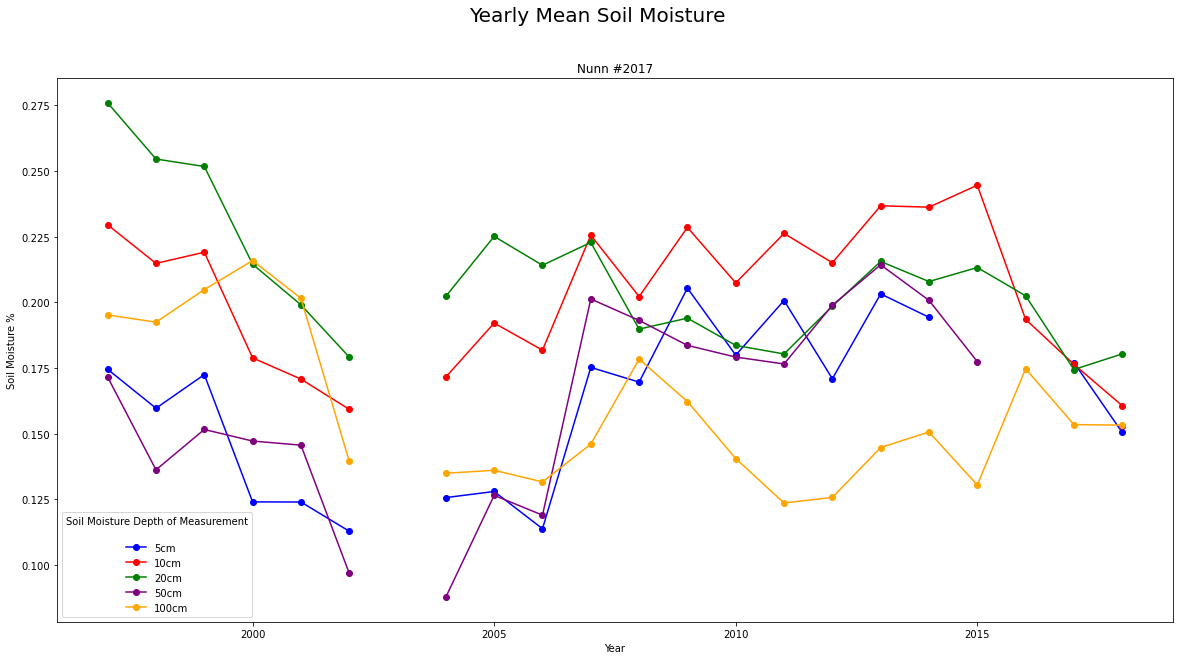

In [45]:
# Plot of yearly average soil moisture for a specified station across all years of data
customfunctions.plot_yearly_avg_sm(soil_moisture_dict[variable], variable)

### Monthly plots

* The code cell below will generate a plot of monthly mean soil moisture based on an input of the station name and the year specified.  This name must match the name given in the "Download and Import Data" section for the station.  AKA it must be the name of the station's key in the dictionary created to hold all of the station soil moisture dataframes.

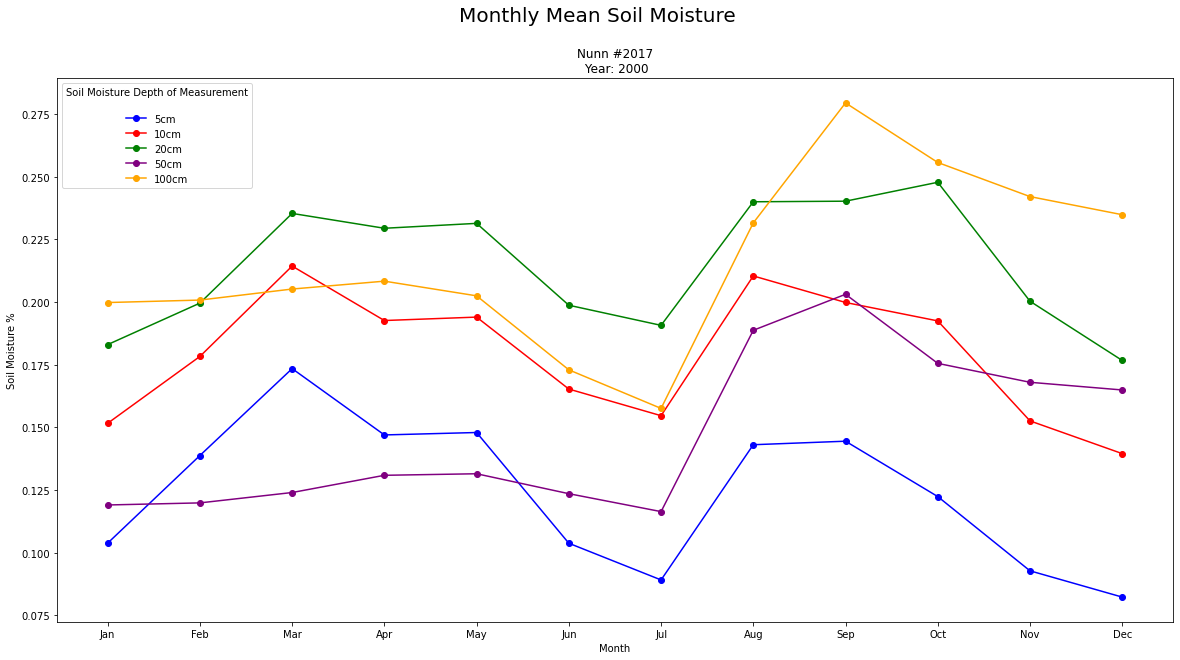

In [46]:
# Plot monthly average soil moisture for a specific station and year
customfunctions.plot_monthly_avg_sm(soil_moisture_dict[variable], year_view, variable+"\n Year: "+year_str)

### Daily plots

* The code cell below will generate a plot of daily mean soil moisture based on an input of the station name and the year specified.  This name must match the name given in the "Download and Import Data" section for the station.  AKA it must be the name of the station's key in the dictionary created to hold all of the station soil moisture dataframes.

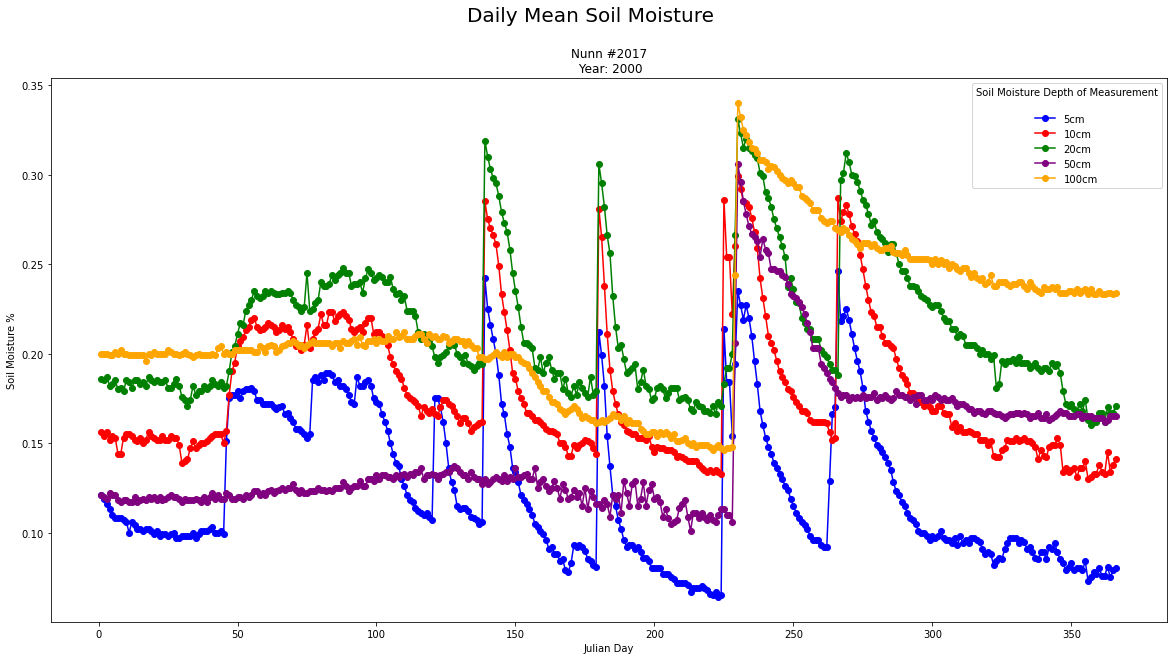

In [47]:
# Plot of daily mean soil moisture at a specified station for a specified year
customfunctions.plot_daily_avg_sm(soil_moisture_dict[variable], year_view, variable+"\n Year: "+year_str)

### Decad Plot -- IN-PROGRESS

### Pentad Plot -- IN-PROGRESS